## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [20]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

### SGD optimizer with momentum(no nesterov)

In [25]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.90
NESTEROV = False

In [26]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=NESTEROV, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 2.028

196/196 [==============================] - 3s 17ms/step - loss: 1.3295 - accuracy: 0.5251 - val_loss: 1.5504 - val_accuracy: 0.4670
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________

196/196 [==============================] - 3s 17ms/step - loss: 0.5855 - accuracy: 0.7921 - val_loss: 1.6368 - val_accuracy: 0.5276
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.5864 - accuracy: 0.7932 - val_loss: 1.6604 - val_accuracy: 0.5302
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1656 - accuracy: 0.5919 - val_loss: 1.3733 - val_accuracy: 0.5134
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1659 - accuracy: 0.5901 - val_loss: 1.3283 - val_accuracy: 0.5301
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________


196/196 [==============================] - 3s 17ms/step - loss: 1.6965 - accuracy: 0.4086 - val_loss: 1.6999 - val_accuracy: 0.4065
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6928 - accuracy: 0.4104 - val_loss: 1.6961 - val_accuracy: 0.4089
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6893 - accuracy: 0.4100 - val_loss: 1.6926 - val_accuracy: 0.4107
Experiment with LR = 0.000010
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________


196/196 [==============================] - 4s 18ms/step - loss: 2.0345 - accuracy: 0.2940 - val_loss: 2.0338 - val_accuracy: 0.2990
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0311 - accuracy: 0.2954 - val_loss: 2.0306 - val_accuracy: 0.3007
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0278 - accuracy: 0.2964 - val_loss: 2.0273 - val_accuracy: 0.3007
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0246 - accuracy: 0.2966 - val_loss: 2.0242 - val_accuracy: 0.3021


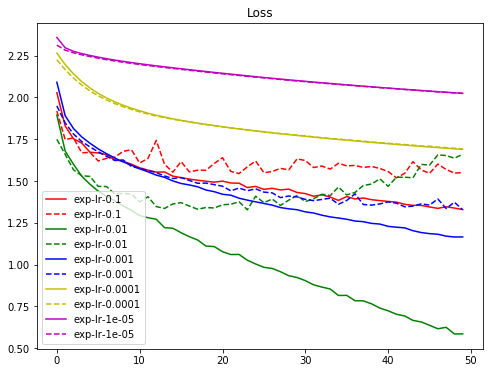

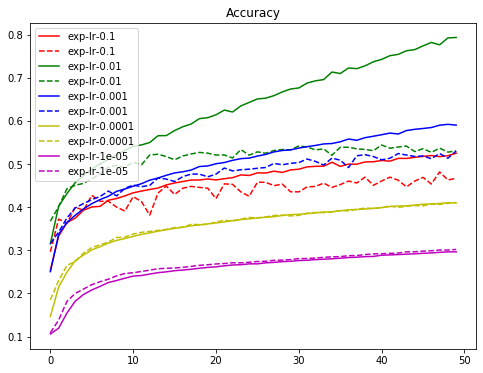

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.90
NESTEROV = True

### SGD optimizer with momentum( nesterov)

In [29]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=NESTEROV, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.095

196/196 [==============================] - 3s 17ms/step - loss: 1.1170 - accuracy: 0.5958 - val_loss: 1.6743 - val_accuracy: 0.4758
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________

196/196 [==============================] - 4s 19ms/step - loss: 0.4449 - accuracy: 0.8437 - val_loss: 1.9472 - val_accuracy: 0.5109
Epoch 50/50
196/196 [==============================] - 3s 18ms/step - loss: 0.4261 - accuracy: 0.8495 - val_loss: 2.0302 - val_accuracy: 0.5187
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

196/196 [==============================] - 4s 21ms/step - loss: 1.1426 - accuracy: 0.5981 - val_loss: 1.3492 - val_accuracy: 0.5241
Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1333 - accuracy: 0.6011 - val_loss: 1.3788 - val_accuracy: 0.5125
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1258 - accuracy: 0.6019 - val_loss: 1.5641 - val_accuracy: 0.4716
Experiment with LR = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________


196/196 [==============================] - 4s 18ms/step - loss: 1.6856 - accuracy: 0.4150 - val_loss: 1.6878 - val_accuracy: 0.4091
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6820 - accuracy: 0.4152 - val_loss: 1.6859 - val_accuracy: 0.4091
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6787 - accuracy: 0.4174 - val_loss: 1.6828 - val_accuracy: 0.4100
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6753 - accuracy: 0.4175 - val_loss: 1.6795 - val_accuracy: 0.4128
Experiment with LR = 0.000010
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________________

Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0840 - accuracy: 0.2766 - val_loss: 2.0833 - val_accuracy: 0.2795
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0807 - accuracy: 0.2781 - val_loss: 2.0800 - val_accuracy: 0.2810
Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 2.0773 - accuracy: 0.2789 - val_loss: 2.0766 - val_accuracy: 0.2818
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0741 - accuracy: 0.2802 - val_loss: 2.0734 - val_accuracy: 0.2833


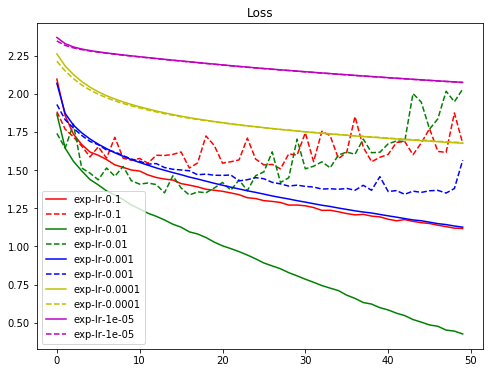

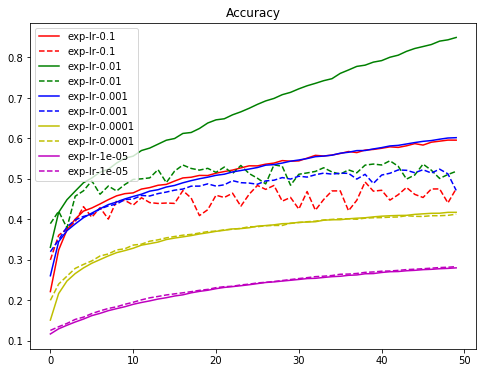

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()